In [1]:
import ImageReward as RM
model = RM.load("ImageReward-v1.0")

# rewards = model.score("<prompt>", ["<img1_obj_or_path>", "<img2_obj_or_path>", ...])



/home/jovyan/konovalova/envs/lora/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load checkpoint from /home/jovyan/.cache/ImageReward/ImageReward.pt
checkpoint loaded


In [2]:
from datasets import load_dataset

ds = load_dataset("limingcv/MultiGen-20M_depth_eval", cache_dir='/workspace/home/jovyan/shares/SR006.nfs2/konovalova')

In [3]:
ds['validation']

Dataset({
    features: ['image', 'control_depth', 'text'],
    num_rows: 5000
})

In [17]:
images_path = '/home/jovyan/konovalova/controlnet_redout/work_dirs/eval_dirs/MultiGen-20M_depth_eval/validation/weights_controlnet_7.5-20/images/'

In [18]:
from PIL import Image
scores = []

for j in range(4):
    for i in range(20):
        text = ds['validation'][i]['text']
        image = f'{images_path}/group_{j}/{i}.png'
    
        score = model.score(text, [image])
        scores.append(score)

In [19]:
import numpy as np

np.mean(scores)

np.float64(0.3750062817125581)

In [21]:
path_reward = '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_reward_only_checkpoint-1000_controlnet_7.5-20/images/'

In [23]:
from PIL import Image
scores = []

for j in range(4):
    for i in range(20):
        text = ds['validation'][i]['text']
        image = f'{path_reward}/group_{j}/{i}.png'
    
        score = model.score(text, [image])
        scores.append(score)
np.mean(scores)

np.float64(0.28355974587611854)

In [28]:
our_best = '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_readout_init_elem_both_loss_rerun_checkpoint-1000_controlnet_7.5-20/images'

In [29]:
from PIL import Image
scores = []

for j in range(4):
    for i in range(20):
        text = ds['validation'][i]['text']
        image = f'{our_best}/group_{j}/{i}.png'
    
        score = model.score(text, [image])
        scores.append(score)
np.mean(scores)

np.float64(0.37531699035316707)

In [30]:
edges_path = '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_edges_control_checkpoint-1000_controlnet_7.5-20/images'

In [31]:
from PIL import Image
scores = []

for j in range(4):
    for i in range(20):
        text = ds['validation'][i]['text']
        image = f'{edges_path}/group_{j}/{i}.png'
    
        score = model.score(text, [image])
        scores.append(score)
np.mean(scores)

np.float64(0.33218878833577037)

In [57]:
edges_depth = '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_edges_depth_control_checkpoint-1000_controlnet_7.5-20/images/'

In [59]:
from PIL import Image
scores = []

for j in range(4):
    for i in range(20):
        text = ds['validation'][i]['text']
        image = f'{edges_depth}/group_{j}/{i}.png'
    
        score = model.score(text, [image])
        scores.append(score)
        #print(score)
np.mean(scores)

np.float64(0.27453484619036317)

In [60]:
reward_path = 'work_dirs/eval_dirs/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_correct_reward_controlnet_sd15_depth_res512_bs256_lr1e-5_warmup100_scale-1.0_iter10k_fp16_train0-1k_reward0-200_mse-loss_reward_only_checkpoint-10000_controlnet_7.5-20/images'

In [63]:
from PIL import Image
from tqdm import tqdm
import torch
scores = []

for j in range(4):
    for i in tqdm(range(5000)):
        text = ds['validation'][i]['text']
        image = f'{reward_path}/group_{j}/{i}.png'
        #print(reward_path)
    
        score = model.score(text, [image])
        scores.append(score)
        torch.save(scores, 'reward_scores.pt')
        
np.mean(scores)

100%|██████████| 5000/5000 [04:28<00:00, 18.65it/s]


np.float64(0.30475179916297795)

In [64]:
our_best_path = 'work_dirs/eval_dirs_1/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_reward_controlnet_sd15_depth_res512_bs256_lr1e-5_warmup100_scale-1.0_iter10k_fp16_train0-1k_reward0-200_mse-loss_new_scale_checkpoint-10000_controlnet_7.5-20/images'

In [65]:
from PIL import Image
from tqdm import tqdm
import torch
scores = []

for j in range(4):
    for i in tqdm(range(5000)):
        text = ds['validation'][i]['text']
        image = f'{our_best_path}/group_{j}/{i}.png'
    
        score = model.score(text, [image])
        scores.append(score)
        torch.save(scores, 'our_best_scores.pt')
        # print(score)
        # assert False
np.mean(scores)

100%|██████████| 5000/5000 [04:29<00:00, 18.53it/s]


np.float64(0.23934636641499082)

In [47]:
np.array(torch.load('reward_scores.pt')) - np.array(torch.load('our_best_scores.pt'))

array([0., 0., 0., ..., 0., 0., 0.], shape=(20000,))

In [54]:
np.array(torch.load('reward_scores.pt'))

array([0.24658598])

In [56]:
np.array(torch.load('our_best_scores.pt'))

array([ 0.24658598,  1.0508095 ,  0.6631844 , ..., -2.2830689 ,
        0.10221501, -0.302394  ], shape=(20000,))

In [4]:
all_path = ['/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_reward_only_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_new_loss_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_new_loss_2_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_new_loss_1_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_edges_depth_control_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_edges_control_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_readout_zero_tensor_null_0.4_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_readout_zero_tensor_null_only_readout_augment_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_init_gauss_gauss_augmentation_checkpoint-1000_controlnet_7.5-20/images',       
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_init_gauss_noise_augmentation_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_init_gauss_blur_augmentation_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_lpips_depth_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_cosine_depth_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_unet_consistency_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/smal_test/MultiGen-20M_depth_eval/validation/weights_controlnet__7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_checkpoint-1000_controlnet_7.5-20/images'
           ]

            

In [4]:
all_path = ['/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_permuted_consistency_0.4_checkpoint-1000_controlnet_7.5-20/images',
            '/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_permuted_0.4_checkpoint-1000_controlnet_7.5-20/images'
           ]
            

In [6]:
from PIL import Image
import numpy as np

for path in all_path:
    
    scores = []
    for j in range(4):
        for i in range(50):
            text = ds['validation'][i]['text']
            image = f'{path}/group_{j}/{i}.png'
        
            score = model.score(text, [image])
            scores.append(score)
            #print(score)
    print(path)
    print(np.mean(scores))

/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_reward_only_checkpoint-1000_controlnet_7.5-20/images
0.2709877798426896
/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_new_loss_checkpoint-1000_controlnet_7.5-20/images
0.3131496529560536
/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_new_loss_2_checkpoint-1000_controlnet_7.5-20/images
0.1591417352715507
/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/_home_jovyan_konovalova_controlnet_redout_MultiGen_small_tests_0_600_1e-5_new_loss_1_checkpoint-1000_controlnet_7.5-20/images
0.3062701125140302
/home/jovyan/konovalova/contr

In [5]:
from PIL import Image
import numpy as np

for path in all_path:
    
    scores = []
    for j in range(4):
        for i in range(50):
            text = ds['validation'][i]['text']
            image = f'{path}/group_{j}/{i}.png'
        
            score = model.score(text, [image])
            scores.append(score)
            #print(score)
    print(path)
    print(np.mean(scores))

/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_permuted_consistency_0.4_checkpoint-1000_controlnet_7.5-20/images
0.3142302376125008
/home/jovyan/konovalova/controlnet_redout/work_dirs/small_test/MultiGen-20M_depth_eval/validation/MultiGen_small_tests_0_600_1e-5_readout_permuted_0.4_checkpoint-1000_controlnet_7.5-20/images
0.2853317161631276


In [1]:
import torch
import matplotlib.pyplot as plt

labels = torch.load('labels.pt').cpu()
obs_feat = torch.load('obs_feat.pt').cpu()

In [7]:
import torchvision

obs_feat = torchvision.transforms.functional.resize(obs_feat.unsqueeze(1).float(), (512, 512), interpolation=torchvision.transforms.InterpolationMode.BILINEAR)

In [11]:
labels = torchvision.transforms.functional.resize(labels.unsqueeze(1), (512, 512), interpolation=torchvision.transforms.InterpolationMode.BILINEAR).float()

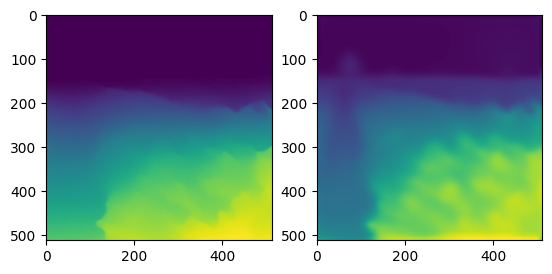

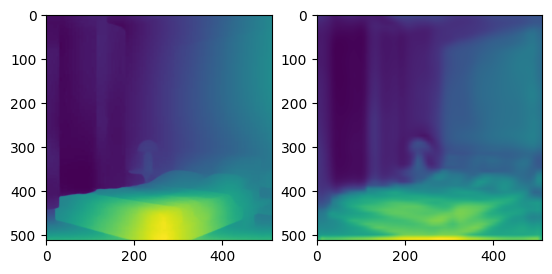

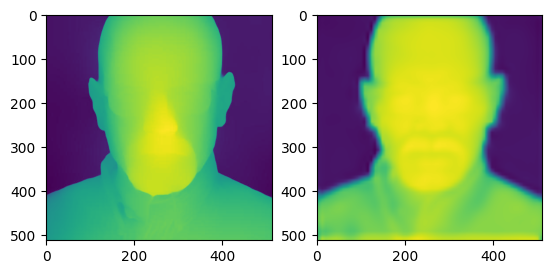

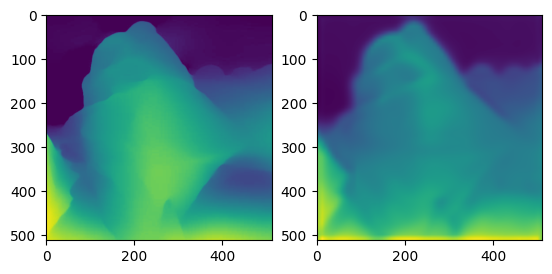

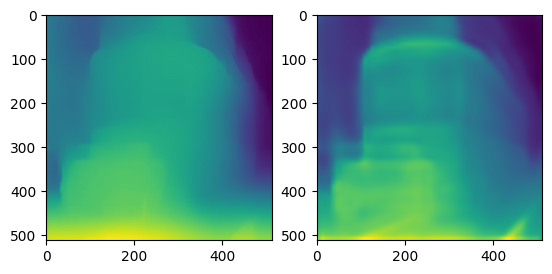

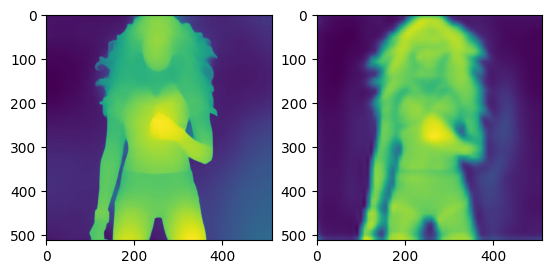

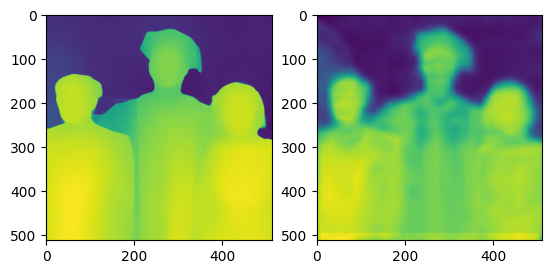

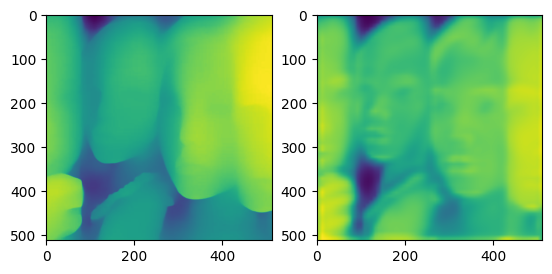

In [13]:
for i in range(len(labels)):
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(labels[i].mean(0).cpu())
    axs[1].imshow(obs_feat[i].mean(0).cpu().detach())
    plt.show()